In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ivan.data.dataset import ElectroInterDataset
from ivan.model.unet import UNet
from ivan.data.processing import create_mask_from_image, create_image_from_mask

import numpy as np
from tqdm.auto import tqdm
import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [13]:
DATA_PATH = "../data/processed"
EPOCHS = 100
DEVICE = "cuda"

In [21]:
dataset = ElectroInterDataset(DATA_PATH)
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

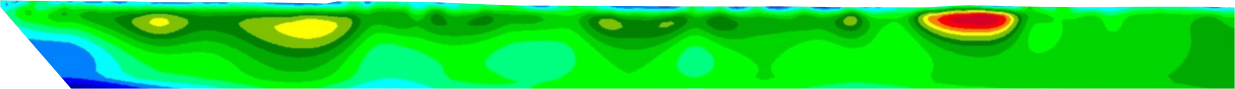

In [26]:
dataset.get_sample(1)[0]

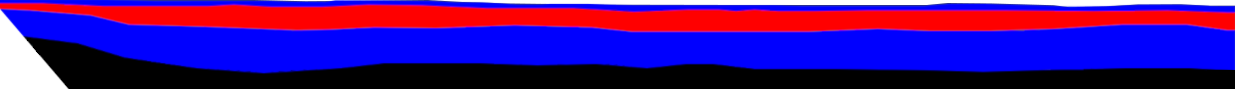

In [27]:
dataset.get_sample(1)[1]

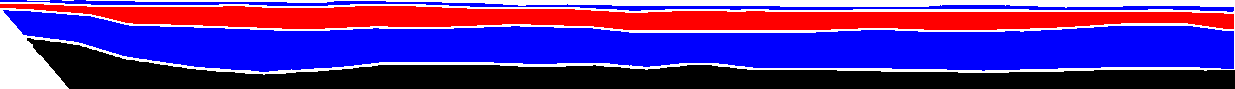

In [6]:
create_image_from_mask(create_mask_from_image(dataset.get_sample(0)[1]))

In [7]:
model = UNet(4, 17).to(DEVICE)
opt = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

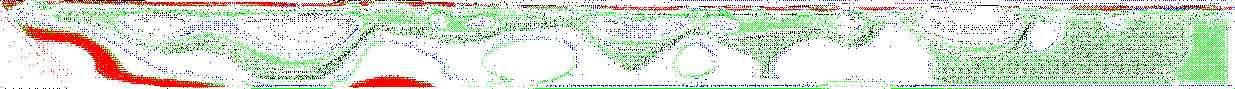

In [10]:
with torch.no_grad():
    gen_image = model(dataset[0][0][None, ...].cuda())

create_image_from_mask(torch.argmax(gen_image, dim=1)[0].cpu().numpy())

In [11]:
loss_func = torch.nn.CrossEntropyLoss(ignore_index=0)

In [12]:
loss_history = []
generated_images_history = []
log_step = 10

In [14]:
for epoch in tqdm(range(EPOCHS)):
    for images, labels in train_dataloader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        
        model.zero_grad()
        generated_images = model(images)
        loss = loss_func(generated_images, labels)
        loss.backward()
        
        loss_history.append(loss.item())
        if epoch % log_step == 0:
            generated_images_history.append(generated_images)
        opt.step()

  0%|          | 0/100 [00:00<?, ?it/s]

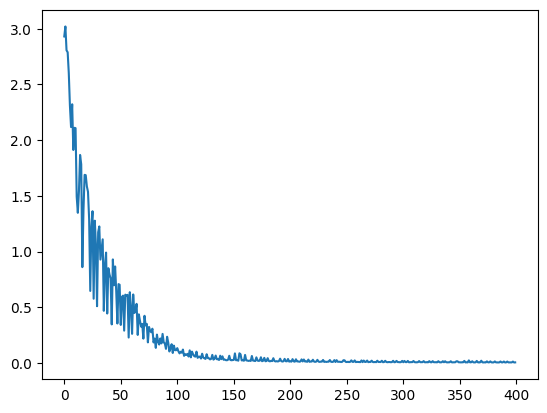

In [15]:
plt.plot(loss_history)

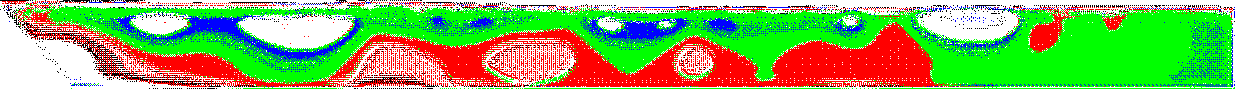

In [51]:
create_image_from_mask(torch.argmax(generated_images_history[3], dim=1)[0].cpu().numpy())

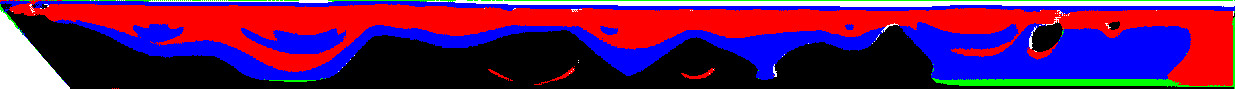

In [53]:
create_image_from_mask(torch.argmax(generated_images_history[7], dim=1)[0].cpu().numpy())

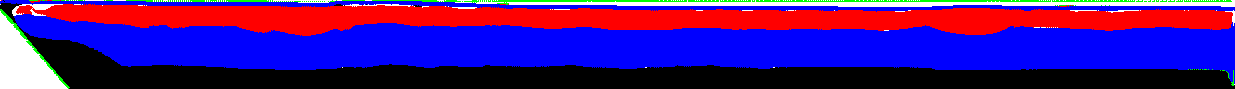

In [54]:
create_image_from_mask(torch.argmax(generated_images_history[11], dim=1)[0].cpu().numpy())

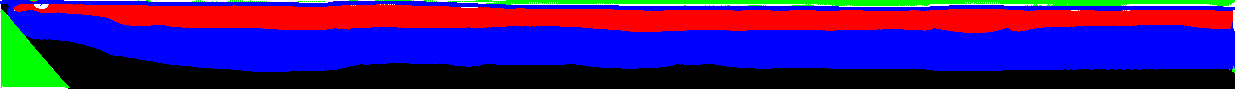

In [55]:
create_image_from_mask(torch.argmax(generated_images_history[15], dim=1)[0].cpu().numpy())

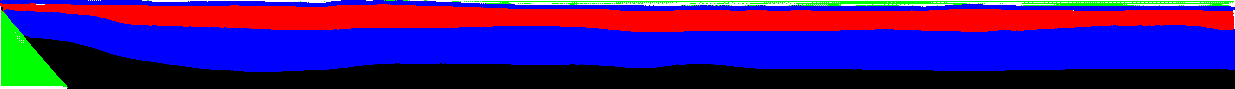

In [58]:
create_image_from_mask(torch.argmax(generated_images_history[20], dim=1)[0].cpu().numpy())

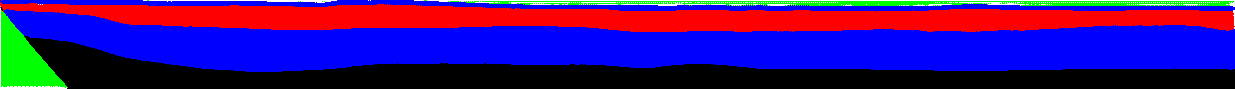

In [65]:
create_image_from_mask(torch.argmax(generated_images_history[27], dim=1)[0].cpu().numpy())

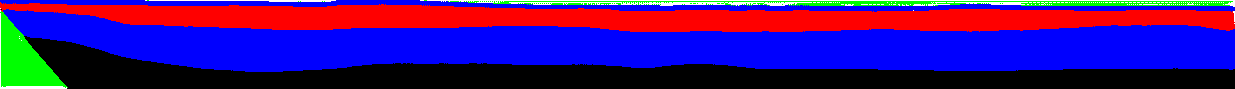

In [70]:
create_image_from_mask(torch.argmax(generated_images_history[32], dim=1)[0].cpu().numpy())